# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv(r'C:\Users\owner\Desktop\insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__
### The mean rightly corresponds with the statistic summary of the data. The same thing with the Standard Deviation, however it corresponded with value when the degree of freedom is not at default ie ddof = 1.

Text(0, 0.5, 'Count')

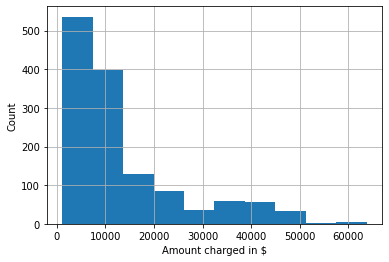

In [5]:
#Histogram of Medical charges
medical['charges'].hist()
plt.xlabel('Amount charged in $')
plt.ylabel('Count')

In [6]:
#Calculating the Mean and Standard Deviation of the Medical charges
charge_mean = np.mean(medical['charges'])
charge_std = np.std(medical['charges'], ddof = 1)
print(f'The calculated Mean of the the Medical Charges: {charge_mean}')
print(f'The calculated Standard Deviation of the the Charges: {charge_std}')

The calculated Mean of the the Medical Charges: 13270.422265141257
The calculated Standard Deviation of the the Charges: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 
### To estimate the uncertainty of our statistics, the mean, by generating a large family of samples from the original subset dataset (medical['charges']). After which we characterize the distribution of the mean of this family. This is Bootstrapping technique.
### We can use the sampling distribution as the most appropriate frequentist test which will determine or estimate the mean of the sampling distribution, the standard error, and a 90% confidence interval. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
#### The second illustrated histogram with 3 vertical lines shows the relevant 95% confidence interval for the mean sample. The red line indicates the 0.025 quantile of 11067.693382387499 and the 0.975 quantile (yelow line) of 15890.65565362525. 

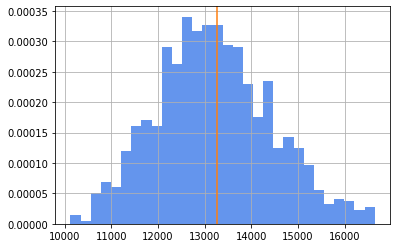

In [7]:
# generate a bootstrap smaple
medical['charges'].sample(100, replace = True).mean();

# generate a bootstrap smaple for many times
bootstrap = pd.DataFrame({'meansample':[medical['charges'].sample(100, replace = True).mean() for i in range(1000)]})

_ = bootstrap.meansample.hist(color = 'cornflowerblue', bins = 30, density = True)

plt.axvline(medical['charges'].mean(), color = 'C1')

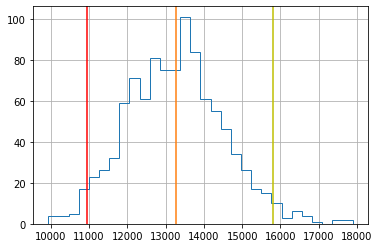

In [8]:
# adding the lower and upper quantile lines
bootstrap = pd.DataFrame({'meansample':[medical['charges'].sample(100, replace = True).mean() for i in range(1000)]})

bootstrap.meansample.hist(bins = 30, histtype = 'step')

plt.axvline(medical['charges'].mean(), color = 'C1')
plt.axvline(bootstrap.meansample.quantile(0.025), color ='r')
plt.axvline(bootstrap.meansample.quantile(0.975), color = 'y')

In [9]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(medical['charges'], medical['charges'].mean())
print("p-values:", pval)

if pval <0.05:
    print("reject null hypothesis")
else:
    print("accept the null hypothesis")

p-values: 1.0
accept the null hypothesis


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The variances between the insured medical and uninsured medical were insignificantly noticeable and would not constitute a signficant change. However, people with medical insurance are charged more than those without insurance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ As shown in the next 3 cell, is the manual approach that can calculate the value of the test statisic and probability value using the python coding involving simple algebra as shown in the two equations above.

In [10]:
# we define the two groups under the insuranceclaim
insured_medical = medical.query('insuranceclaim ==1')
uninsured_medical = medical.query('insuranceclaim ==0')

<AxesSubplot:ylabel='Density'>

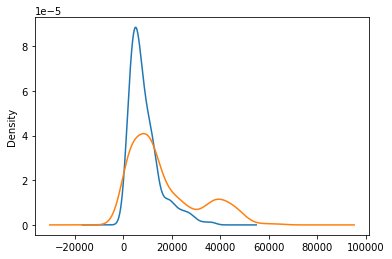

In [11]:
# plots of the medical charges to the insured and uninsured.
uninsured_medical.charges.plot.density()
insured_medical.charges.plot.density()

In [12]:
# Manual computation of the pooled standard deviation for the performance of the
# hypothesis test
x0 = uninsured_medical.mean()
x1 = insured_medical.mean()
s0 = uninsured_medical.std()
s1 = insured_medical.std()

n0 = uninsured_medical.shape[0]
n1 = insured_medical.shape[0]

# Pooled standard deviation
pooled_std = np.sqrt( ((n0 - 1)*(s0**2)+(n1 - 1)*(s1**2))/(n0 + n1 -2))

# the calculation of t-test statistic
t_test = (x0 - x1)/(pooled_std*np.sqrt(1/n0 + 1/n1))

In [13]:
#two sample t-test and probability value

ttest = ttest_ind(insured_medical.charges, uninsured_medical.charges)
print(ttest.statistic)
print(ttest.pvalue/2)

11.893299030876712
2.2306151158103587e-31


In [17]:
# degree of freedom
df = insured_medical.shape[0] + uninsured_medical.shape[0]-2

#t.ppf(0, df, t_test)
#t.cdf(0, df, t_test);

1336


Text(0.5, 1.0, 'T test')

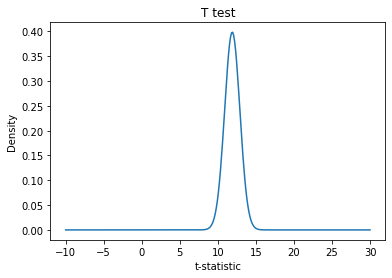

In [18]:
#graphical representation t-test statistic under the defined degree of freedom
x=np.linspace(-10,30,300)
y=t.pdf(x,df,ttest.statistic)
plt.plot(x,y)
plt.ylabel('Density')
plt.xlabel('t-statistic')
plt.title('T test')

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
### Of course yes, there is a 1- sample z-test just like in the cases of t-test for 1-sample. The essence of z-test arises for sample sizes greater than 30. As we have 1-sample, 2-samples in t-test we equally have in z-test too. The origin of z-test was that t-test cannot handle sample sizes greater than 30 whether for 1-samle or 2-sample cases.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test